In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Preprocessing & Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [4]:
# Load dataset 
df = pd.read_csv("loan_approval_dataset.csv")

# Display first 5 rows
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
# Check shape
print("Dataset shape:", df.shape)

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Check categorical vs numerical
print("\nData types:\n", df.dtypes.value_counts())


Dataset shape: (4269, 13)

Missing values:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Data types:
 int64     10
object     3
Name: count, dtype: int64


In [8]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

# Impute missing values
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_num = SimpleImputer(strategy="mean")

df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

print("Missing values after imputation:\n", df.isnull().sum().sum())


Missing values after imputation:
 0


In [10]:
# Encode categorical columns with LabelEncoder
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2.0,0,0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,0
1,2.0,0.0,1,1,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,1
2,3.0,3.0,0,0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,1
3,4.0,3.0,0,0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,1
4,5.0,5.0,1,1,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,1


In [22]:
# Target column is 'loan_status'
X = df.drop(" loan_status", axis=1)
y = df[" loan_status"]

print("Features shape:", X.shape)
print("Target distribution:\n", y.value_counts())


Features shape: (4269, 12)
Target distribution:
  loan_status
0    2656
1    1613
Name: count, dtype: int64


In [32]:
# Train-test split (stratify keeps class balance in test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
# Scale numerical values (optional, RandomForest doesn't need it but good for other models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
# Train RandomForest Classifier
model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       531
           1       0.99      0.95      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854


Confusion Matrix:
 [[529   2]
 [ 15 308]]


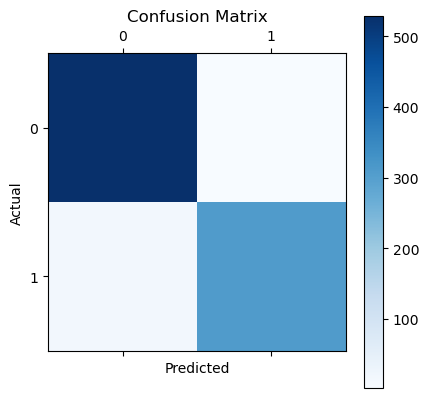

In [38]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
plt.matshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
